### Intoduction to  scikit-learn

In [4]:
import pandas as pd
import warnings
import numpy as np
heart = pd.read_csv("heart-disease.csv") #collection of data
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
warnings.filterwarnings("default")

In [6]:
x = heart.drop("target", axis=1)

y = heart["target"]

## choosing proper classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## fitting the model

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [9]:
clf.fit(x_train, y_train);
clf.score(x_test, y_test)

0.8852459016393442

## make predictions

In [10]:
x_pred = clf.predict(x_test)
x_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

## Evaluate the model

In [11]:
clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.8852459016393442

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
print(classification_report(y_test, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [14]:
confusion_matrix(y_test, x_pred)

array([[22,  6],
       [ 1, 32]], dtype=int64)

In [15]:
accuracy_score(y_test, x_pred)

0.8852459016393442

## Improve the model

In [16]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"Tring model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:2f}%")
    print("")

Tring model with 10 estimators...
Model accuracy on test set: 78.688525%

Tring model with 20 estimators...
Model accuracy on test set: 86.885246%

Tring model with 30 estimators...
Model accuracy on test set: 85.245902%

Tring model with 40 estimators...
Model accuracy on test set: 85.245902%

Tring model with 50 estimators...
Model accuracy on test set: 85.245902%

Tring model with 60 estimators...
Model accuracy on test set: 90.163934%

Tring model with 70 estimators...
Model accuracy on test set: 83.606557%

Tring model with 80 estimators...
Model accuracy on test set: 90.163934%

Tring model with 90 estimators...
Model accuracy on test set: 86.885246%



## saving the model and load it

In [17]:
import pickle

pickle.dump(clf, open("Random_Forest_Model_1", "wb"))

C:\Users\India\AppData\Local\Temp\ipykernel_4884\2591567090.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='Random_Forest_Model_1'>
  pickle.dump(clf, open("Random_Forest_Model_1", "wb"))


In [18]:
lmodel = pickle.load(open("Random_Forest_Model_1", "rb"))
lmodel.score(x_test, y_test)

C:\Users\India\AppData\Local\Temp\ipykernel_4884\290477903.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='Random_Forest_Model_1'>
  lmodel = pickle.load(open("Random_Forest_Model_1", "rb"))


0.8688524590163934

## A new data set 

In [19]:
# random dataset

sales = pd.read_csv("car-sales.csv")
sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [20]:
sales #price converted into int

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [21]:
x = sales.drop("Price", axis=1)
y = sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Honda'

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat = ["Make", "Colour", "Doors"]
hot = OneHotEncoder()
transformer = ColumnTransformer([("hot", hot, cat)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [24]:
transformed_data = pd.DataFrame(transformed_x)
transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [25]:
dummies = pd.get_dummies(sales[["Make", "Colour", "Doors"]])

In [26]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [27]:
x_train, x_test, y_train, y_test = train_test_split(transformed_data, y, test_size = 0.2)
model.fit(x_train, y_train)

ValueError: could not convert string to float: '$4,500.00'

In [28]:
model.score(x_test, y_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

## Choosing right model for your data

In [29]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [30]:
house = pd.DataFrame(housing['data'], columns = housing["feature_names"])
house

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
house["target"] = housing["target"]
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
np.random.seed(42)
x = house.drop("target", axis = 1)
y = house["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5758549611440127

In [35]:
# Because we have low score, lets check other models so that we can improve our score
# ensemble model

In [36]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = house.drop("target", axis = 1)
y = house["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8065734772187598

In [37]:
heart = pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
# importing the linear SVC esimator class

In [39]:
from sklearn.svm import LinearSVC

np.random.seed(42)
x = heart.drop("target", axis=1)
y = heart["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = LinearSVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\India\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\India\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [40]:
heart["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
np.random.seed(42)
x = heart.drop("target", axis=1)
y = heart["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8524590163934426

## Making predictions using the data

In [43]:
# using trained model to make predictions

In [44]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
# Compare the predictions to truth labels to evaluate the model

In [47]:
y_pred = model.predict(x_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [48]:
model.score(x_test, y_test)

0.8524590163934426

In [49]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [50]:
accuracy_score(y_test, y_pred)

0.8524590163934426

## predict() vs predict_proba()

In [51]:
model.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [52]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
np.random.seed(42)
x = house.drop("target", axis=1)
y=house["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
mon = model.score(x_test, y_test)

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [56]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [57]:
mean_absolute_error(y_test, y_pred)

0.32659871732073664

## Evaluating a classification model

## Accuracy

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart.drop("target",axis=1)
y = heart["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = RandomForestClassifier()
cross_val_score = cross_val_score(model, x, y)

In [59]:
np.mean(cross_val_score)

0.8215300546448088

## ROC 

In [60]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_prob = model.predict_proba(x_test)

y_prob[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [61]:
y_prob_pos = y_prob[:, 1]
y_prob_pos[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [62]:
fpr, tpr, thr = roc_curve(y_test, y_prob_pos)

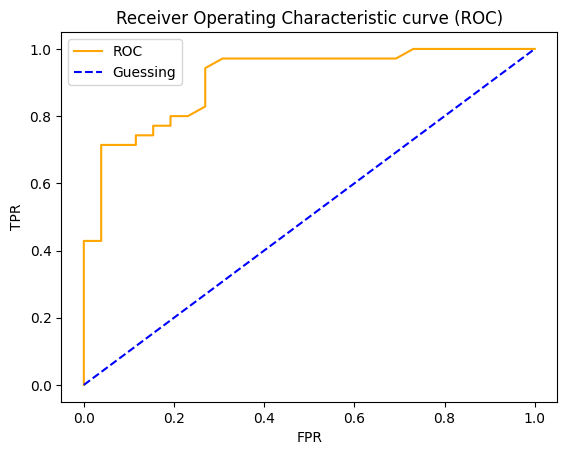

In [63]:
import matplotlib.pyplot as plt

def plotting(fpr, tpr):
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    plt.plot([0,1], [0,1], color = "blue", linestyle = "--", label = "Guessing")

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic curve (ROC)")
    plt.legend()
    plt.show()

plotting(fpr, tpr)

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_pos)

0.9093406593406593

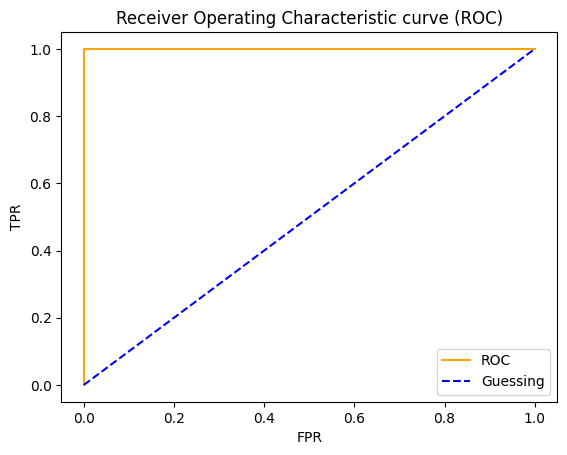

In [65]:
fpr, tpr, thr = roc_curve(y_test, y_test)
plotting(fpr, tpr)

In [66]:
roc_auc_score(y_test, y_test)

1.0

## confusion model

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [69]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21,5
1,8,27


In [70]:
import seaborn as ss

<Axes: >

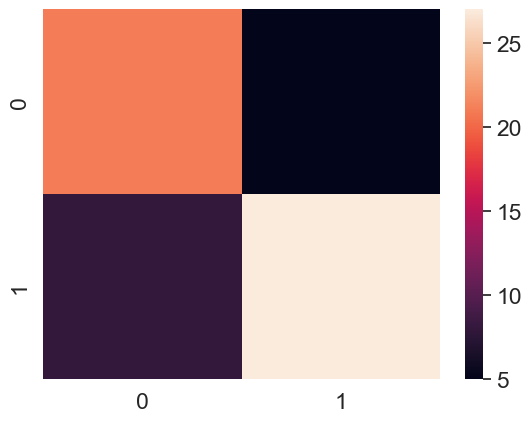

In [71]:
ss.set(font_scale=1.5)

conf = confusion_matrix(y_test, y_pred)
ss.heatmap(conf)

In [72]:
import sklearn
sklearn.__version__

'1.4.2'

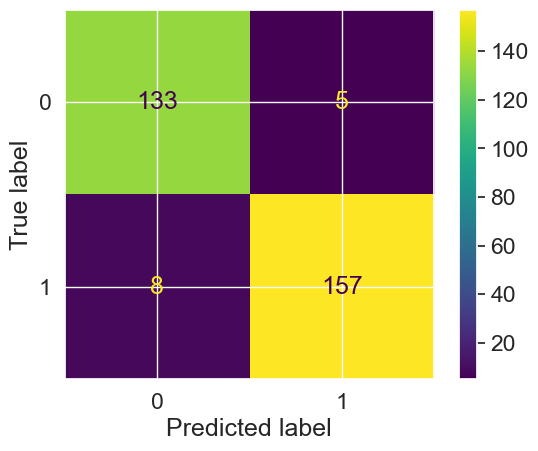

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model, X=x, y=y);

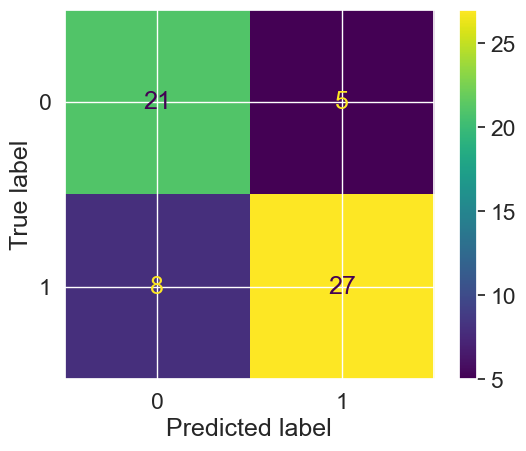

In [74]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);

## 
Classification Report

In [75]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.72      0.81      0.76        26\n           1       0.84      0.77      0.81        35\n\n    accuracy                           0.79        61\n   macro avg       0.78      0.79      0.78        61\nweighted avg       0.79      0.79      0.79        61\n'

In [76]:
y_test.mean()

0.5737704918032787

In [77]:
from sklearn.metrics import r2_score

In [78]:
y_mean = np.full(len(y_test), y_test.mean())

In [79]:
y_mean[:10]

array([0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
       0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049])

In [80]:
r2_score(y_true = y_test, y_pred = y_mean)

0.0

In [81]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

In [82]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.21311475409836064

## Using Cross_validation and Scoring_parameter

In [83]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = heart.drop("target", axis=1)
y = heart["target"]

clf = RandomForestRegressor()

In [85]:
np.random.seed(42)

cal = cross_val_score(clf, x, y, cv=5, scoring = None)

In [86]:
cal

array([0.        , 0.        , 0.32184393, 0.        , 0.        ])

In [87]:
print(f"Cross Validation Mean is: {np.mean(cal)*100:.2f}%")

Cross Validation Mean is: 6.44%


In [88]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [106]:
np.random.seed(42)
x = heart.drop("target", axis=1)
y = heart["target"]

train_split = round(0.7*len(heart))
valid_split = round(train_split+0.15*len(heart))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:test_split], y[train_split:test_split]
x_test, y_test = x[valid_split:], y[valid_split:]

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

d_metrics = accuracy_score(y_true = y_valid, y_pred = y_pred)`

In [107]:
d_metrics

0.6888888888888889